In [2]:
from matplotlib import pyplot
import numpy
import os

In [3]:
import re
re_coords = re.compile(r'^([0-9]+), ([0-9]+)$')

In [4]:
INF = float('inf')

In [5]:
# Parse coordinates
coords = []
for l in puzzle.splitlines():
    m = re_coords.match(l)
    assert m
    x = int(m.group(1))
    y = int(m.group(2))
    coords.append((x, y))
len(coords)

50

In [6]:
# Determine field size
xmin, xmax = INF, -INF
ymin, ymax = INF, -INF
for x, y in coords:
    xmin, xmax = min(xmin, x), max(xmax, x)
    ymin, ymax = min(ymin, y), max(ymax, y)
xmin, xmax, ymin, ymax

(40, 353, 52, 358)

In [7]:
# Allocate array for the field
# Each cell will store which is the closest coordinate, and the distance
field = [
    [(None, INF) for x in range(xmin - 1, xmax + 2)]
    for y in range(ymin - 1, ymax + 2)
]

In [8]:
area = [0] * len(coords)

In [9]:
coords[0]

(77, 279)

In [10]:
if not os.path.exists('anim_06'):
    os.mkdir('anim_06')

def plot_field(field, iteration):
    field_np = numpy.array(
        [
            [-1 if i is None else i for i, d in row]
            for row in field
        ],
        dtype=int,
    )
    fig, ax = pyplot.subplots(figsize=(10, 10))
    ax.imshow(field_np)
    fig.savefig('anim_06/%03d.png' % iteration)
    pyplot.close(fig)

In [11]:
# Add each point to the field
for i, (x, y) in enumerate(coords):
    print('.', end='')
    open_list = [(x - xmin + 1, y - ymin + 1, 0)]  # Cells to process
    closed_set = set()  # Cells already processed
    while open_list:
        # Get next cell to process
        x, y, dist = open_list.pop(0)
        #print("process %d, %d dist=%d" % (x, y, dist))

        # Update the field
        current_i, current_dist = field[y][x]
        if current_dist > dist:
            # `i` is closer, update the cell
            field[y][x] = i, dist
            if current_i is not None:
                area[current_i] -= 1
            area[i] += 1
        elif current_dist == dist:
            # `i` is exactly as close, doesn't count
            field[y][x] = None, dist
            if current_i is not None:
                area[current_i] -= 1

        # Add neighbors to the open list
        for xr, yr in [(1, 0), (0, 1), (-1, 0), (0, -1)]:
            x2, y2 = x + xr, y + yr
            if (0 <= x2 < xmax - xmin + 3 and
                    0 <= y2 < ymax - ymin + 3):
                if (x2, y2) not in closed_set:
                    open_list.append((x2, y2, dist + 1))
                    closed_set.add((x2, y2))

    plot_field(field, i)

..................................................

In [12]:
# Find those areas that are infinite
infinite = set()
for x in range(0, xmax - xmin + 3):
    infinite.add(field[0][x][0])
    infinite.add(field[ymax - ymin + 2][x][0])
for y in range(0, ymax - ymin + 3):
    infinite.add(field[y][0][0])
    infinite.add(field[y][xmax - xmin + 2][0])

In [13]:
max(a for i, a in enumerate(area) if i not in infinite)

3006

In [14]:
# Allocate array for the field
# Each cell stores the sum of distances to all coordinates
field = [
    [0 for x in range(xmin - 1, xmax + 2)]
    for y in range(ymin - 1, ymax + 2)
]

In [15]:
rng = range(xmax - xmin + 3 +
            ymax - ymin + 3)

def update(x, y, dist):
    x -= xmin
    y -= ymin
    if (0 <= x < xmax - xmin + 3 and
            0 <= y < ymax - ymin + 3):
        field[y][x] += dist

for x, y in coords:
    print('.', end='')
    for dist in rng:
        for r in range(0, dist):
            update(x + r, y + dist - r, dist)
            update(x + dist - r, y - r, dist)
            update(x - r, y - dist + r, dist)
            update(x - dist + r, y + r, dist)

..................................................

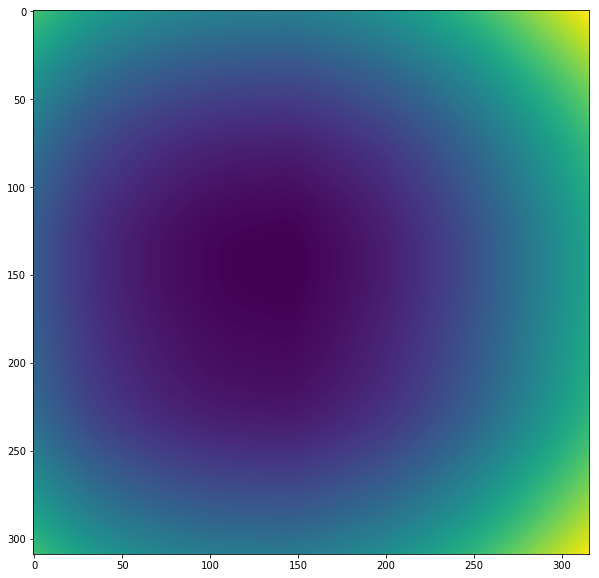

In [16]:
field_np = numpy.array(field, dtype=int)
fig, ax = pyplot.subplots(figsize=(10, 10))
ax.imshow(field_np)
None

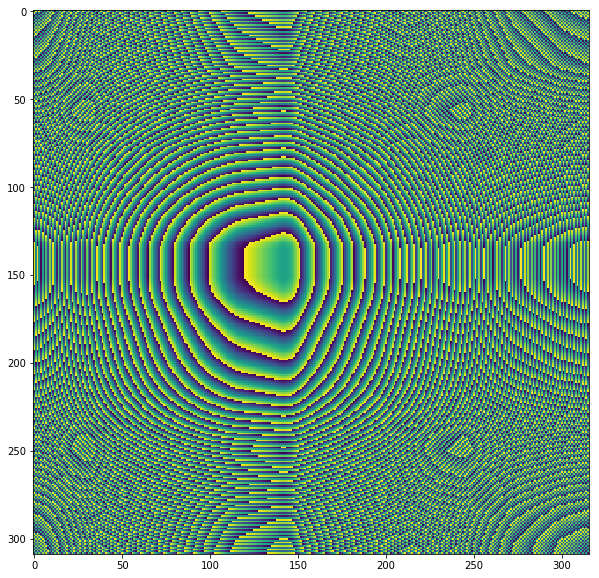

In [17]:
field_np = numpy.array(
    [
        [(d % 100) // 2 for d in row]
        for row in field
    ],
    dtype=int,
)
fig, ax = pyplot.subplots(figsize=(10, 10))
ax.imshow(field_np)
None

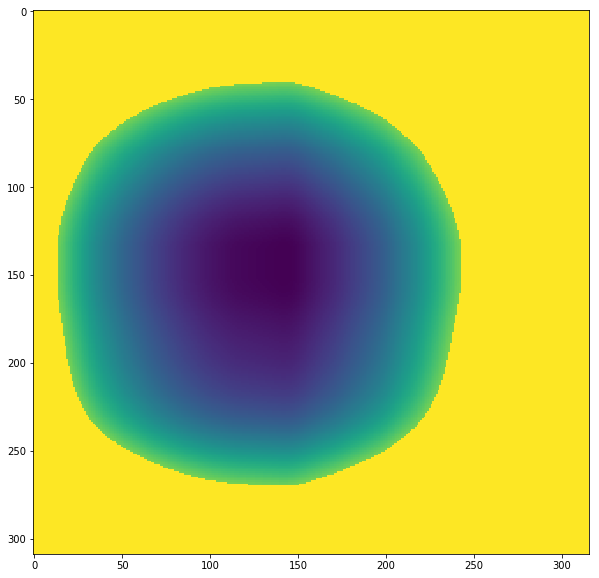

In [18]:
field_np = numpy.array(
    [
        [10500 if d > 10000 else d for d in row]
        for row in field
    ],
    dtype=int,
)
fig, ax = pyplot.subplots(figsize=(10, 10))
ax.imshow(field_np)
None

In [19]:
sum((sum(1 for e in row if e < 10000) for row in field))

42998

In [1]:
puzzle = '''\
77, 279
216, 187
72, 301
183, 82
57, 170
46, 335
55, 89
71, 114
313, 358
82, 88
78, 136
339, 314
156, 281
260, 288
125, 249
150, 130
210, 271
190, 258
73, 287
187, 332
283, 353
66, 158
108, 97
237, 278
243, 160
61, 52
353, 107
260, 184
234, 321
181, 270
104, 84
290, 109
193, 342
43, 294
134, 211
50, 129
92, 112
309, 130
291, 170
89, 204
186, 177
286, 302
188, 145
40, 52
254, 292
270, 287
238, 216
299, 184
141, 264
117, 129
'''